In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


%matplotlib inline

df = pd.read_csv("data/Test.csv")


(16136, 77)

1.Allgemein

In [9]:
df.head()
# df.info()
df.describe(include='all').T 
df.shape  #(16136, 77)


(16136, 77)

2.Missing Values
in 68 spalten fehlen Daten

In [25]:
missing = df.isnull().mean().sort_values(ascending=False)*100
missing[missing >0]

L3_CH4_solar_zenith_angle            80.695340
L3_CH4_solar_azimuth_angle           80.695340
L3_CH4_sensor_zenith_angle           80.695340
L3_CH4_sensor_azimuth_angle          80.695340
L3_CH4_aerosol_optical_depth         80.695340
                                       ...    
L3_AER_AI_solar_azimuth_angle         0.576351
L3_AER_AI_sensor_zenith_angle         0.576351
L3_AER_AI_sensor_azimuth_angle        0.576351
L3_AER_AI_sensor_altitude             0.576351
L3_AER_AI_absorbing_aerosol_index     0.576351
Length: 68, dtype: float64

<Axes: >

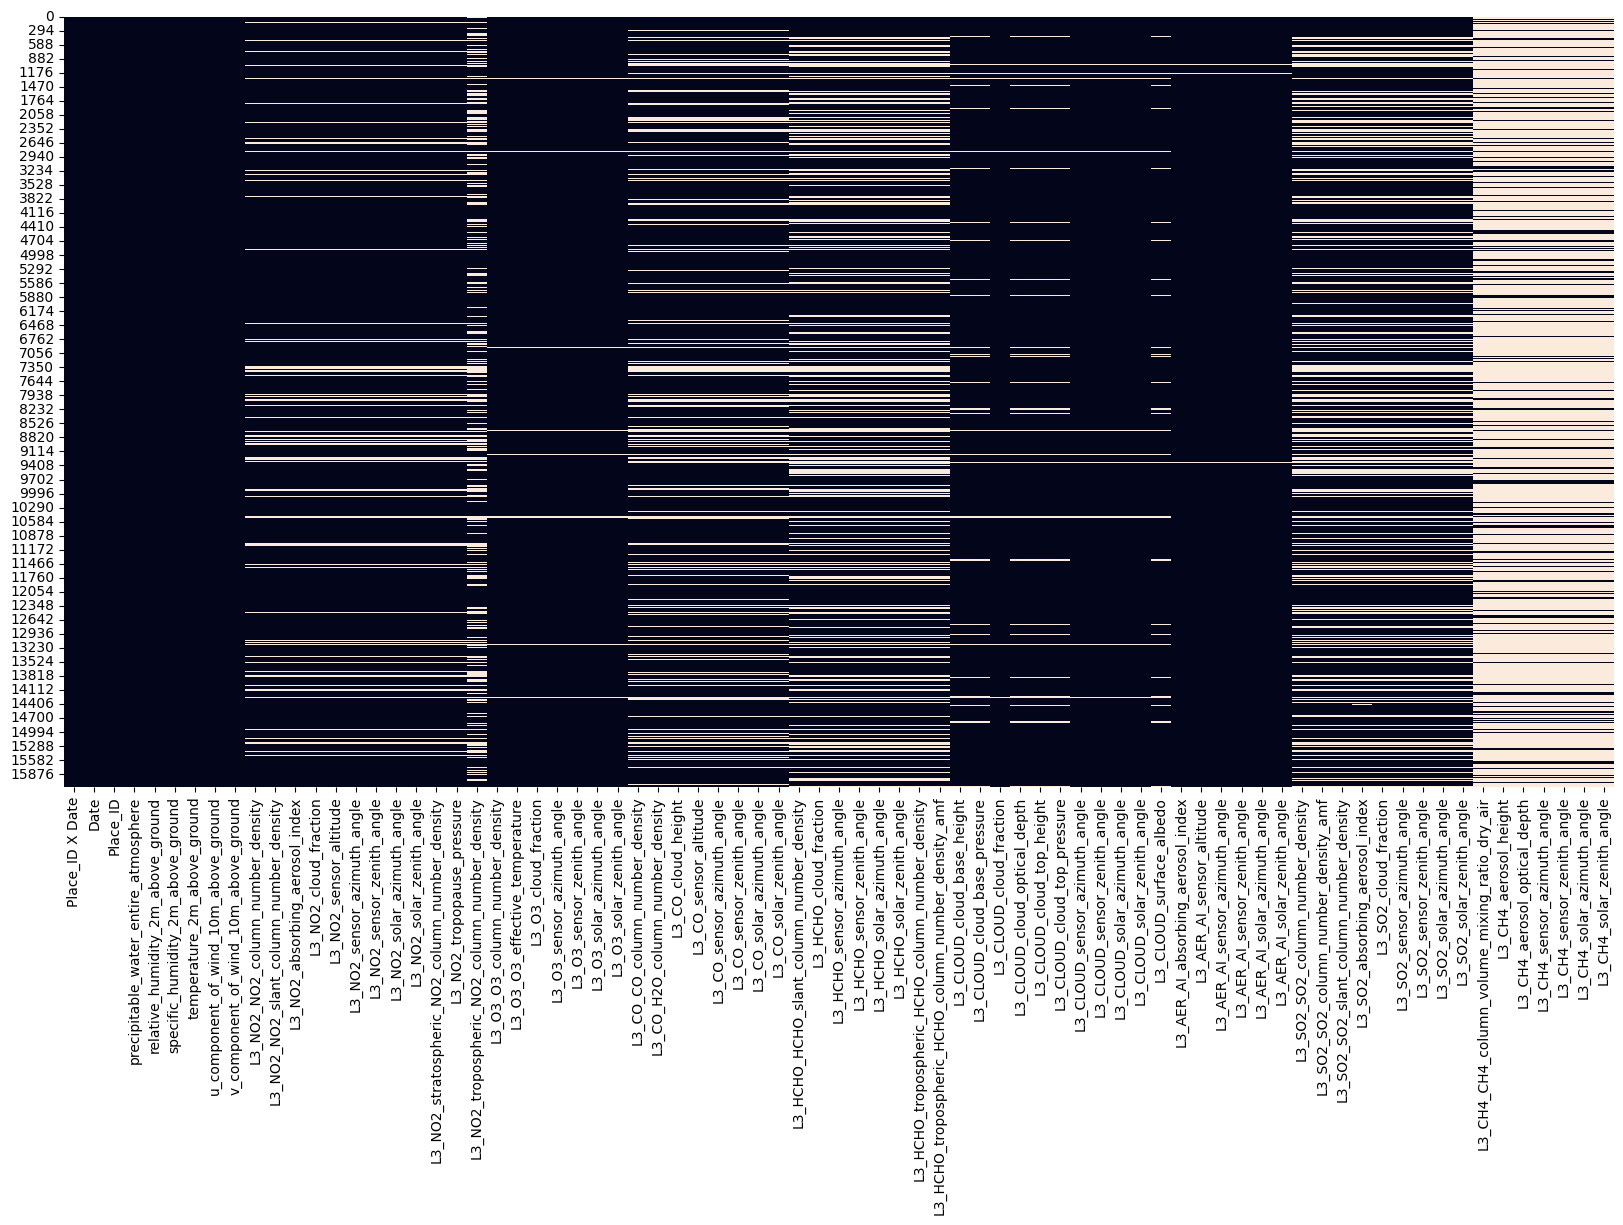

In [27]:
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.heatmap(df.isnull(), cbar=False) #sind das alle Spalten? 
# df.columns[df.isnull().any()] #spaltenNamen in denen Daten fehlen

3.Datentypen / dateFormat

<Axes: >

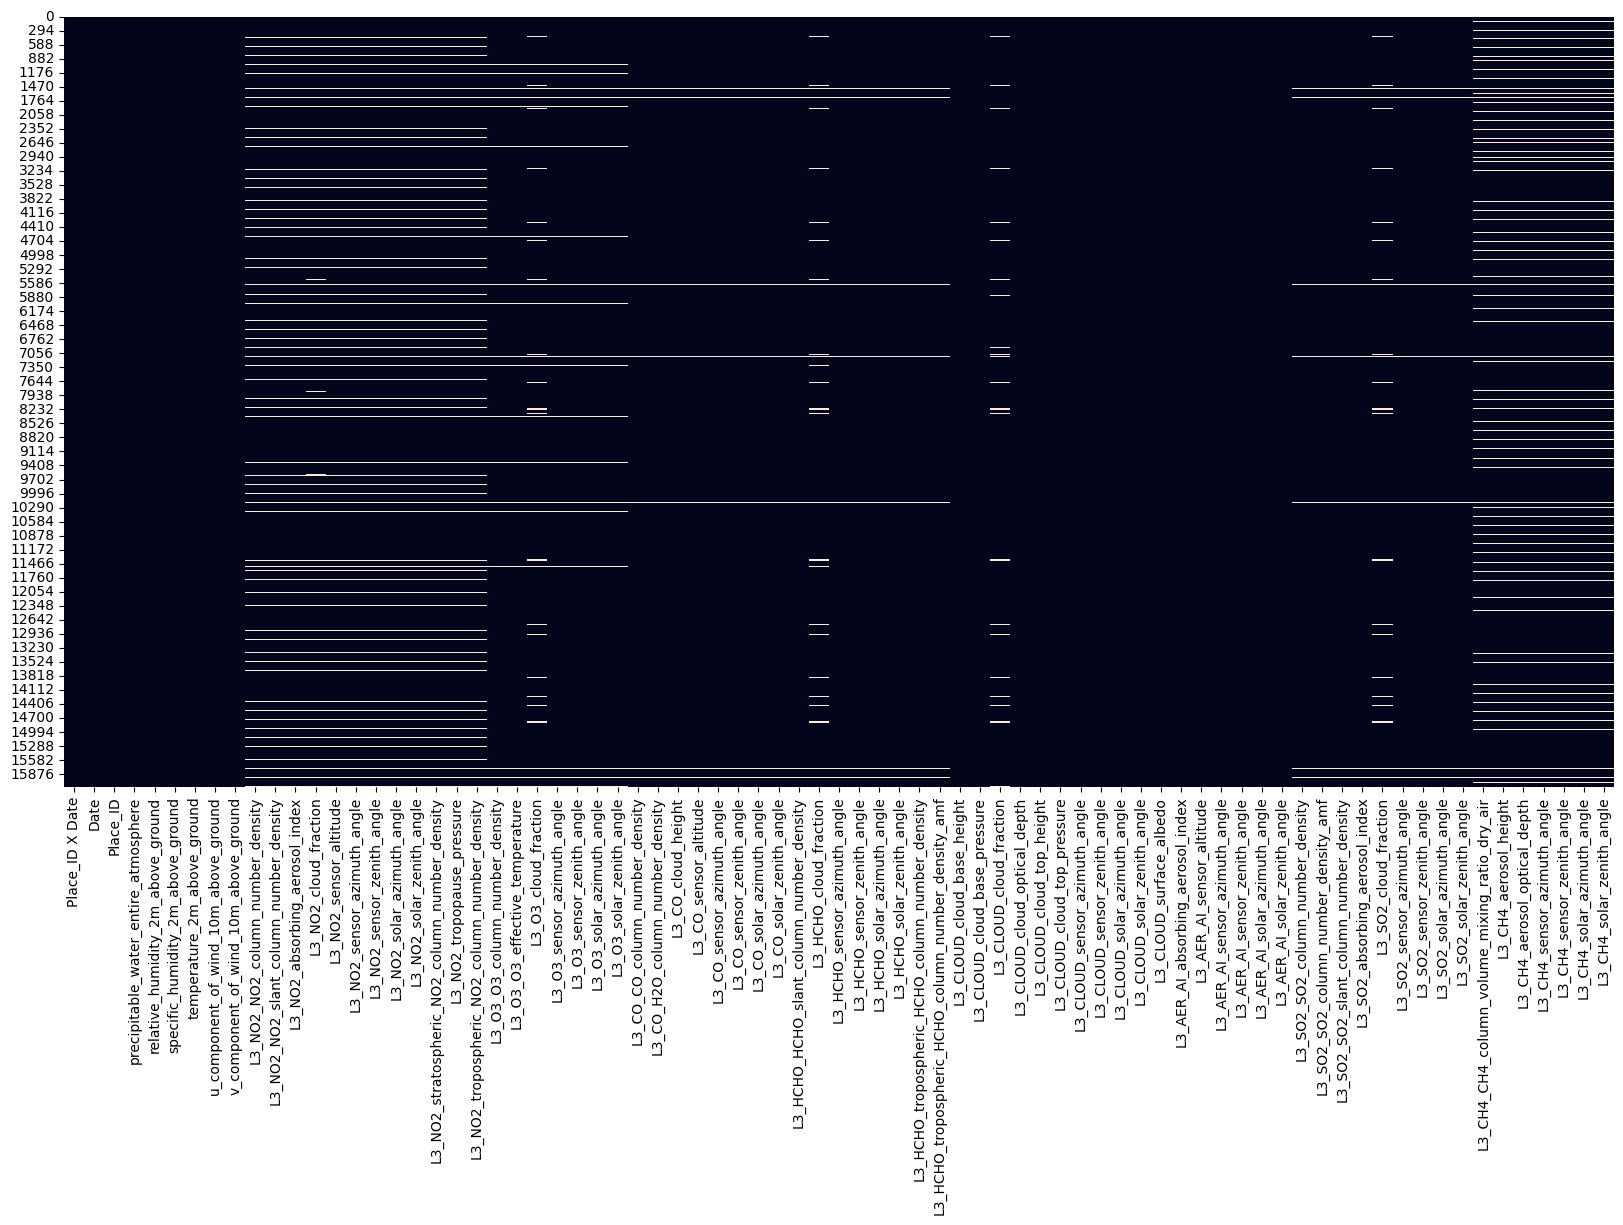

In [40]:
df.dtypes.value_counts()
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
# df.select_dtypes(exclude="number")
df[df == 0]

plt.figure(figsize=(20, 10))
sns.heatmap(df == 0, cbar=False)

4. Kathegorische, Numerische Spalten

In [45]:
cat_cols = df.select_dtypes(exclude=['number']).columns
num_cols = df.select_dtypes(include=['number']).columns


5.Verteilung

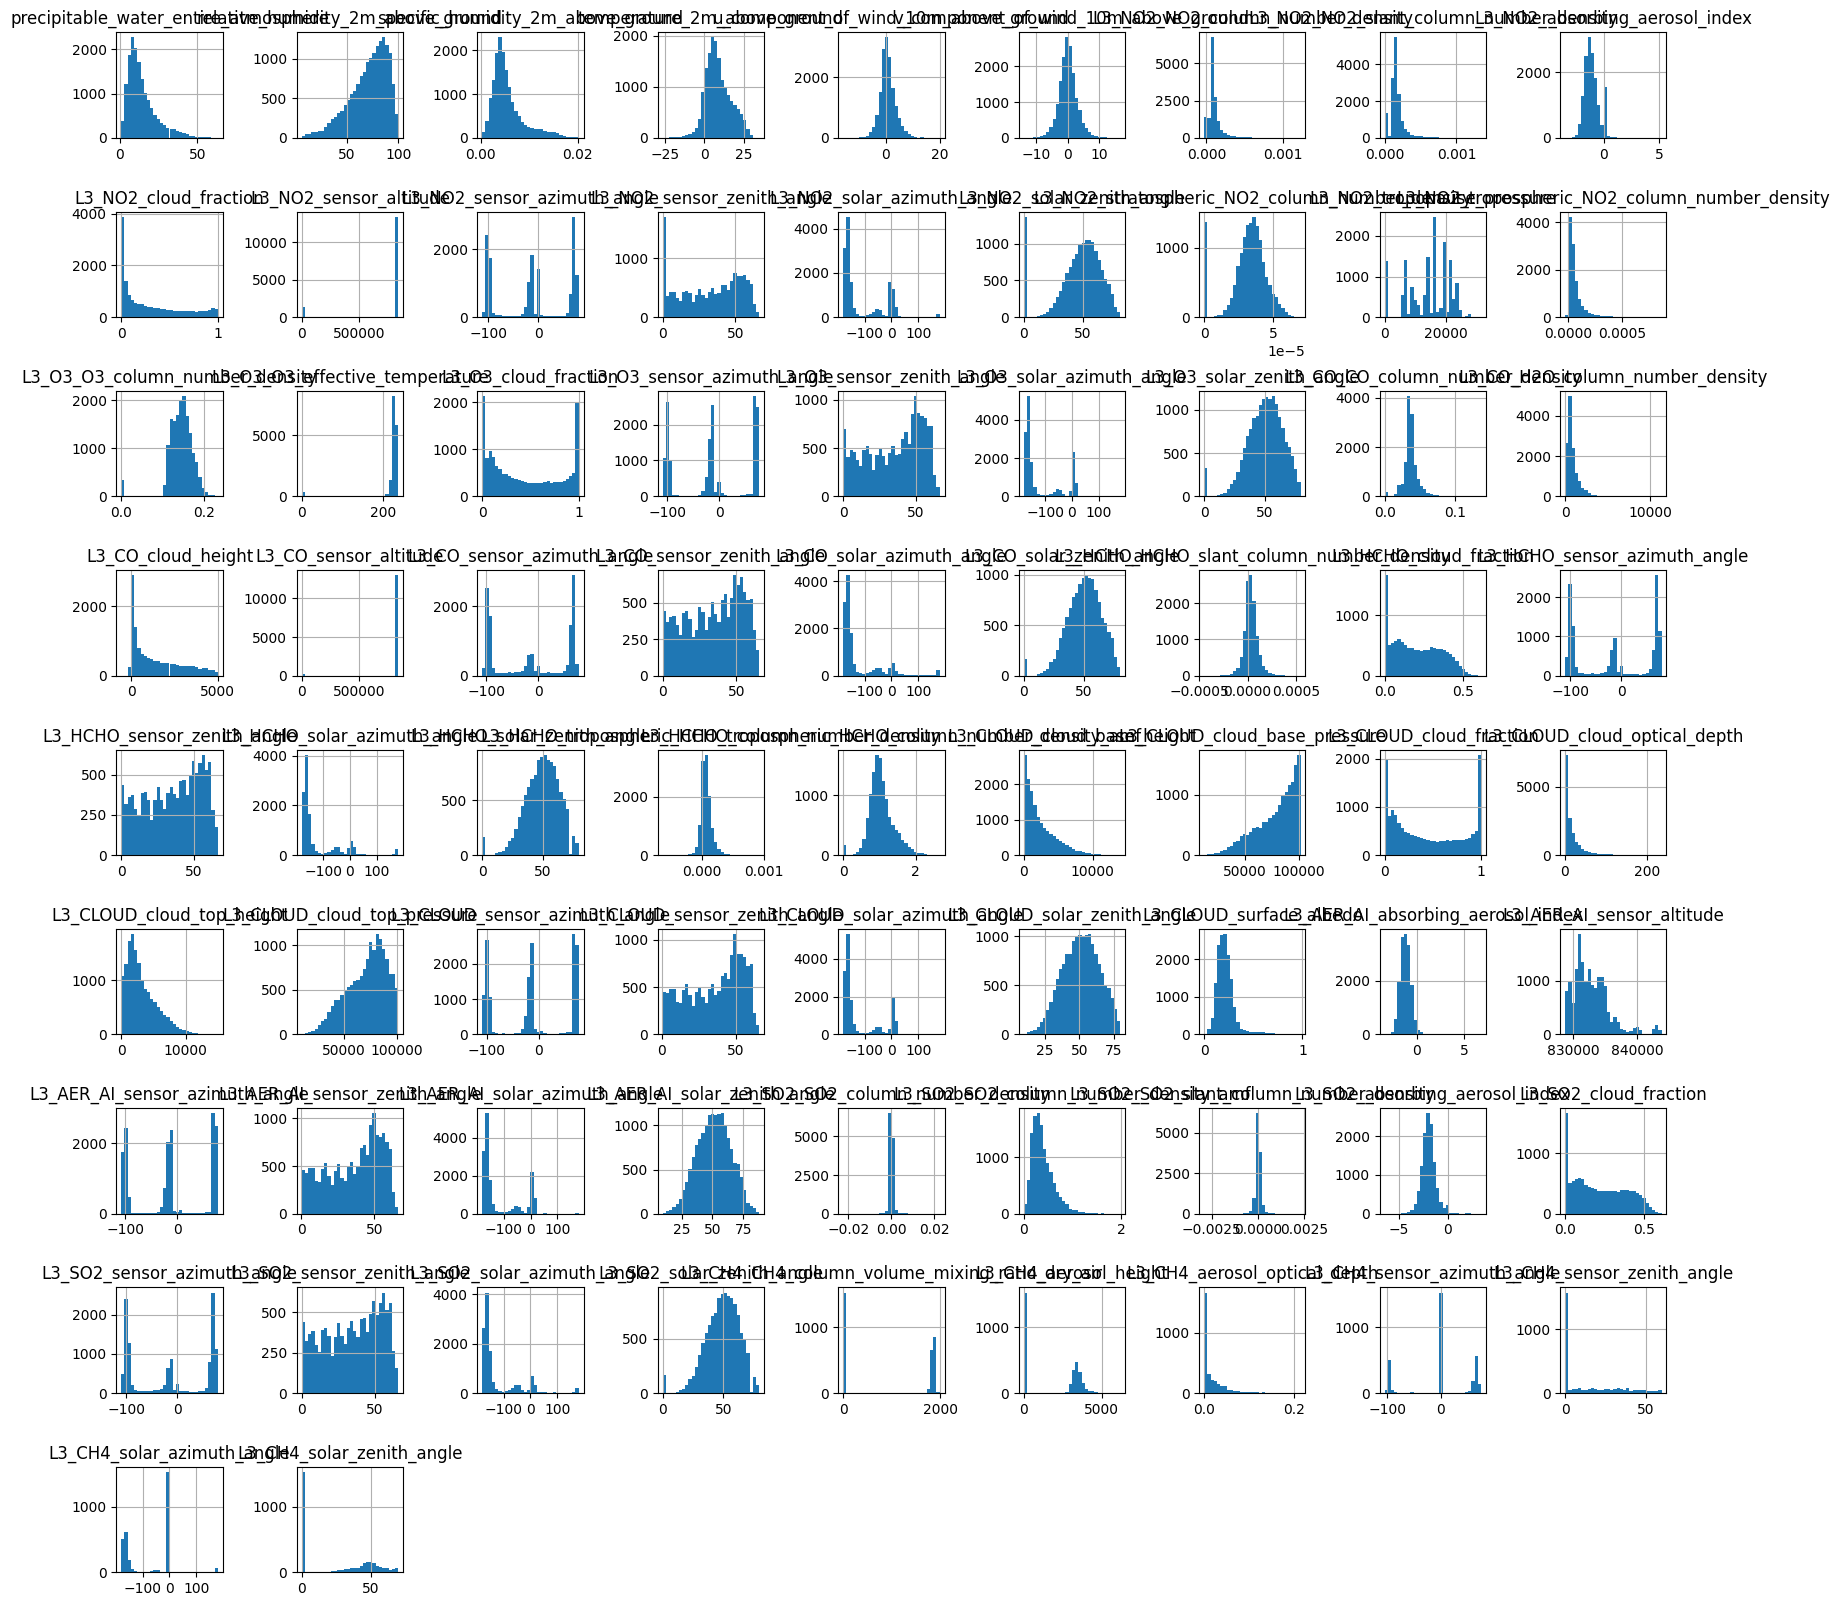

In [50]:
df[num_cols].hist(figsize=(20, 20), bins=30)
plt.subplots_adjust(hspace=0.7, wspace=0.7)


<Axes: >

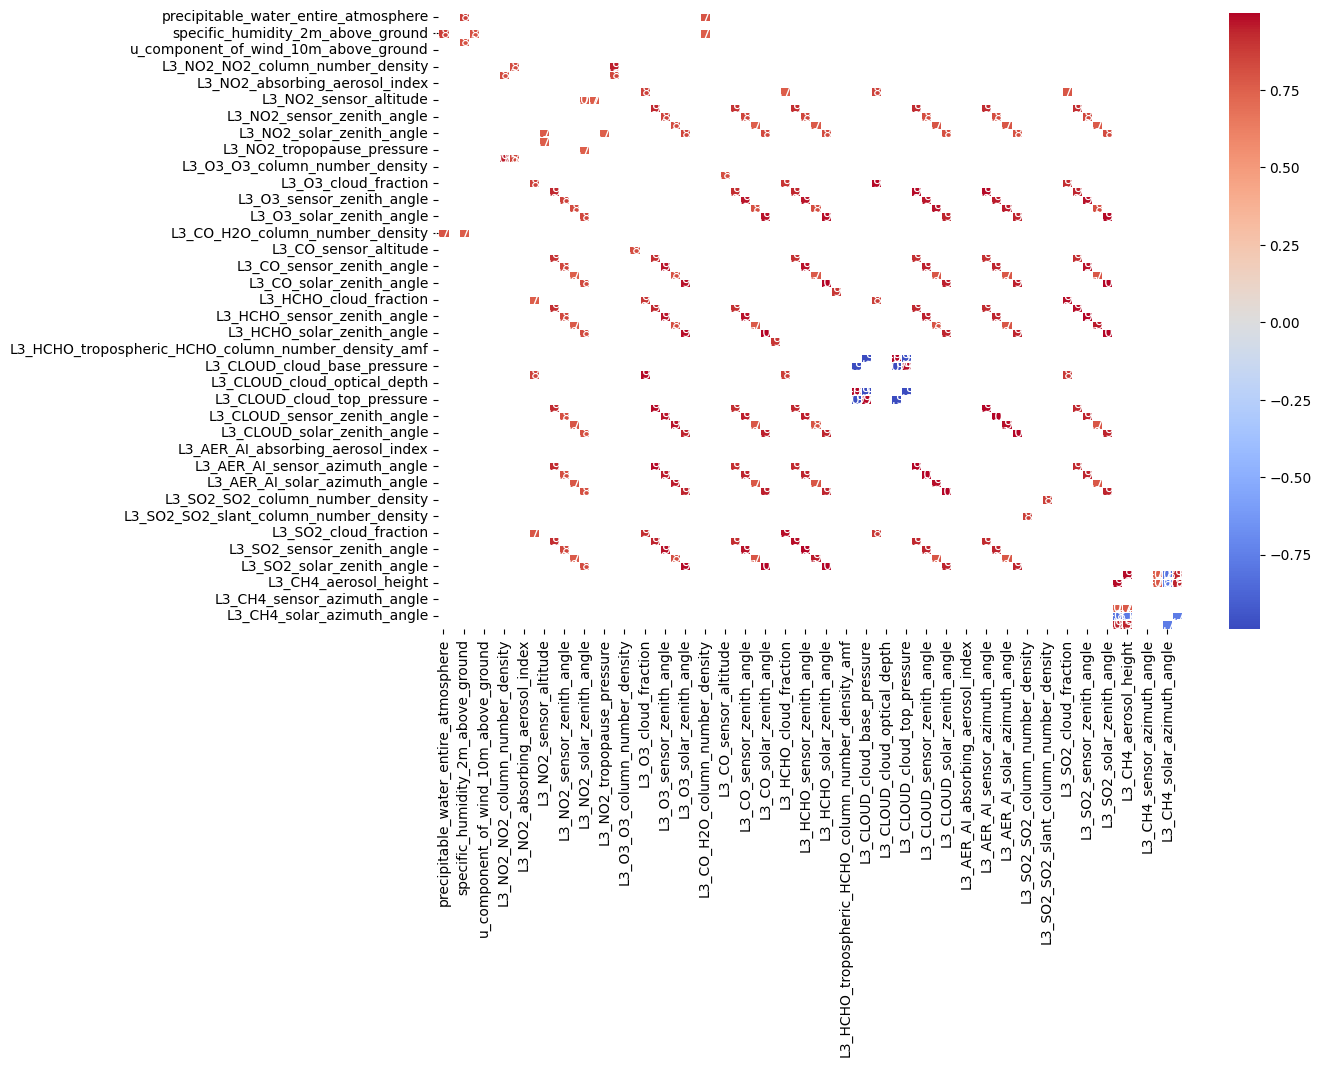

In [61]:
corr = df[num_cols].corr()

plt.figure(figsize=(12, 8))
# sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
# sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, mask=corr>0.99)

corr_clean = corr.dropna(axis=0, how='any').dropna(axis=1, how='any')
high_corr = corr_clean[(abs(corr_clean) > 0.75) & (corr_clean != 1.0)]
sns.heatmap(high_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

6.Ausreisßer

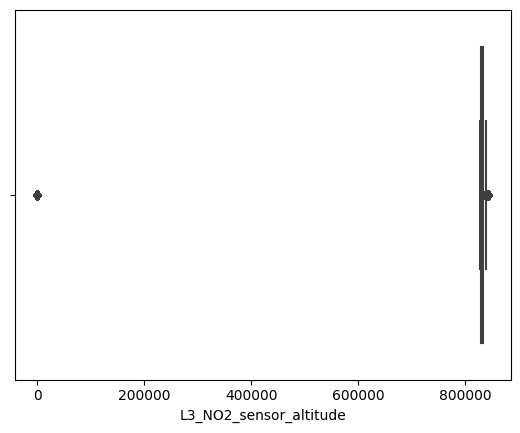

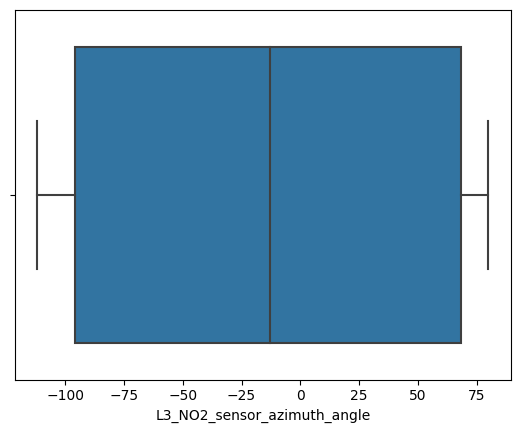

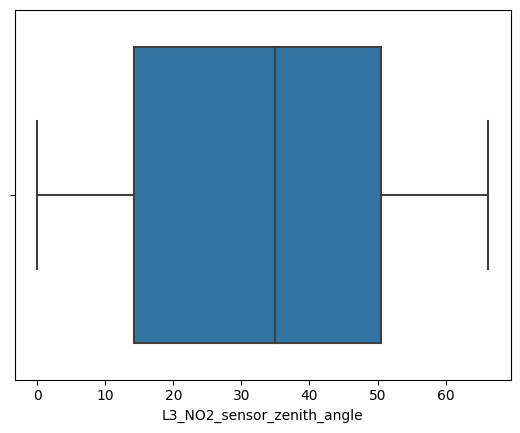

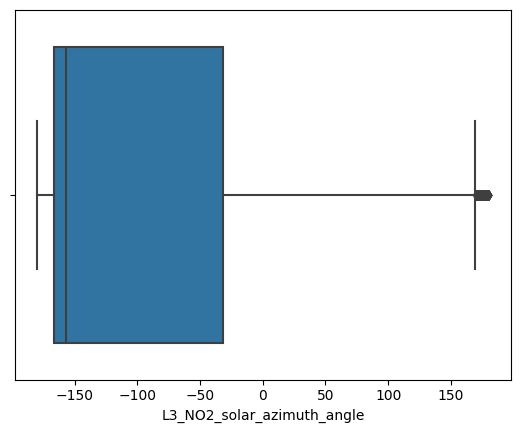

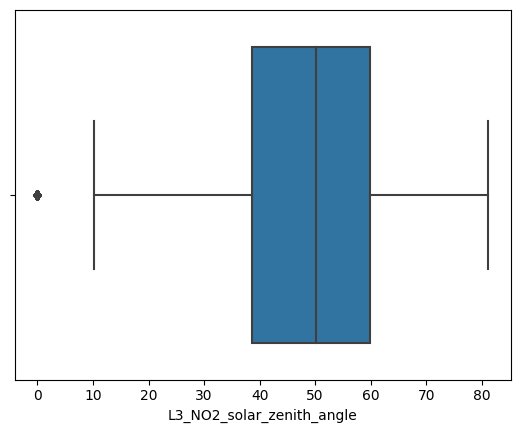

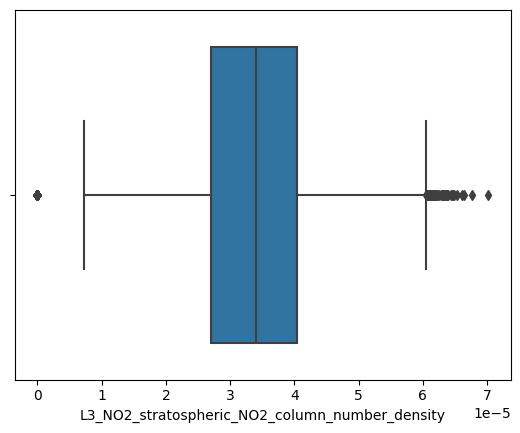

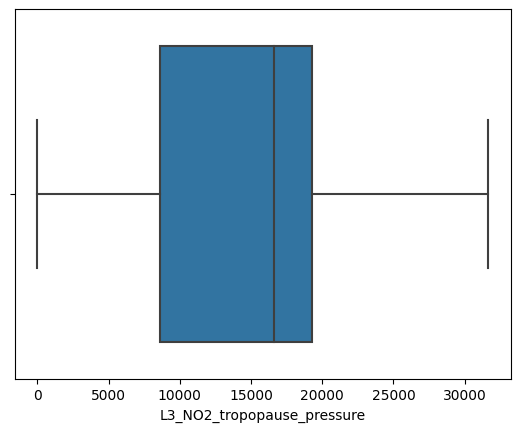

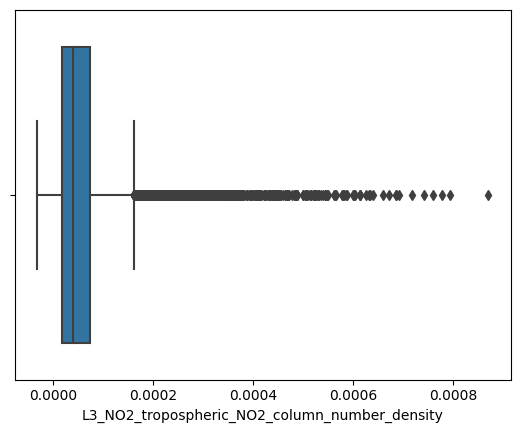

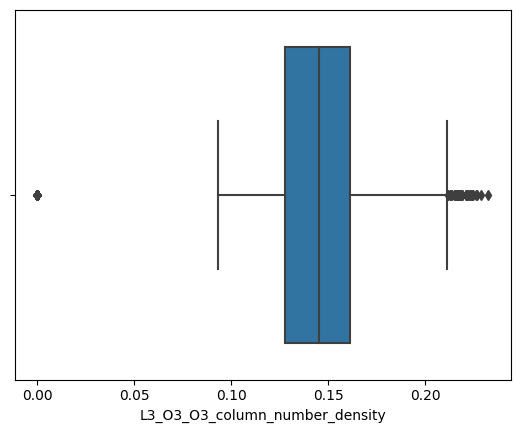

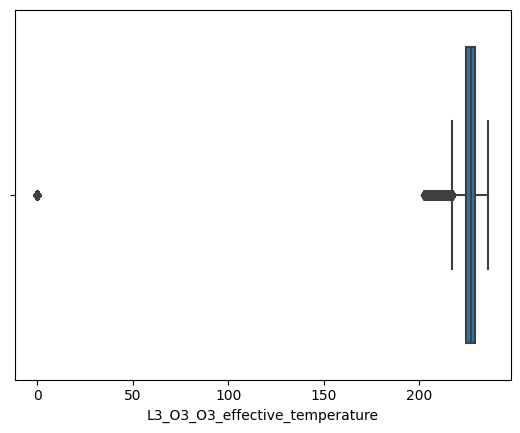

In [ ]:
for col in num_cols[10:20]:  # nur 10 Spalten wegen platz 
    sns.boxplot(x=df[col])
    plt.show()

7. Duplicates

In [68]:
df.duplicated().sum()

0

8. Target

In [78]:
# df['target'].value_counts(normalize=True)
# sns.boxplot(x='target', y='some_feature', data=df)

columns_with_25 = [col for col in df.columns if "daily" in str(col)]
columns_with_25
df

,Place_ID X Date,Date,Place_ID,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,0OS9LVX X 2020-01-02,2020-01-02,0OS9LVX,11.600000,30.200001,0.00409,14.656824,3.956377,0.712605,0.000053,...,1.445658,-95.984984,22.942019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0OS9LVX X 2020-01-03,2020-01-03,0OS9LVX,18.300001,42.900002,0.00595,15.026544,4.230430,0.661892,0.000050,...,34.641758,-95.014908,18.539116,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0OS9LVX X 2020-01-04,2020-01-04,0OS9LVX,17.600000,41.299999,0.00590,15.511041,5.245728,1.640559,0.000050,...,55.872276,-94.015418,14.140820,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0OS9LVX X 2020-01-05,2020-01-05,0OS9LVX,15.011948,53.100002,0.00709,14.441858,5.454001,-0.190532,0.000055,...,59.174188,-97.247602,32.730553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0OS9LVX X 2020-01-06,2020-01-06,0OS9LVX,9.700000,71.599998,0.00808,11.896295,3.511787,-0.279441,0.000055,...,40.925873,-96.057265,28.320527,1831.261597,3229.118652,0.031068,-100.278343,41.84708,-95.910744,28.498789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16131,ZZDJZMS X 2020-03-31,2020-03-31,ZZDJZMS,9.400001,86.200005,0.00413,3.136346,0.073416,0.923135,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16132,ZZDJZMS X 2020-04-01,2020-04-01,ZZDJZMS,17.000000,90.300003,0.00548,6.394495,-1.217649,1.270308,0.000000,...,56.377846,45.983723,40.416741,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16133,ZZDJZMS X 2020-04-02,2020-04-02,ZZDJZMS,19.170641,86.200005,0.00656,9.750879,-0.410603,0.754363,0.000000,...,27.089602,-152.281488,41.202583,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16134,ZZDJZMS X 2020-04-03,2020-04-03,ZZDJZMS,8.400001,66.400002,0.00457,8.322565,1.659441,-2.471616,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
